In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('customer_churn_dataset.csv')
df.head

<bound method NDFrame.head of         CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  

In [3]:
# check nulls
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [4]:
df[df['Age'].isnull() == True]
# appears there is one null value for all cols at idx 199295, remove it
df = df[df['Age'].isnull() == False]
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
# drop customerid
df = df.drop(columns=['CustomerID'])
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
# unique values
df.nunique().sort_values(ascending=True)
# looks good, should only have 2 for gender, 2 for churn, 3 for sub type, 3 for contract length

Gender                   2
Churn                    2
Subscription Type        3
Contract Length          3
Support Calls           11
Usage Frequency         30
Last Interaction        30
Payment Delay           31
Age                     48
Tenure                  60
Total Spend          68363
dtype: int64

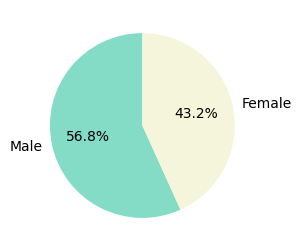

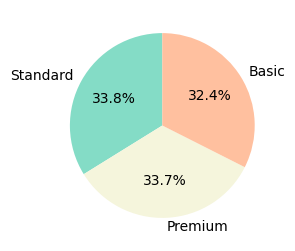

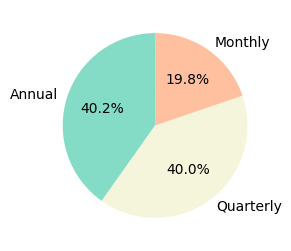

In [7]:
# pie charts of cat vars
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in cat_cols:
    count = df[col].value_counts()
    fig = plt.figure(figsize=(5,3))
    plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=('#84dcc6', 'beige', '#ffc09f'))
    plt.show()

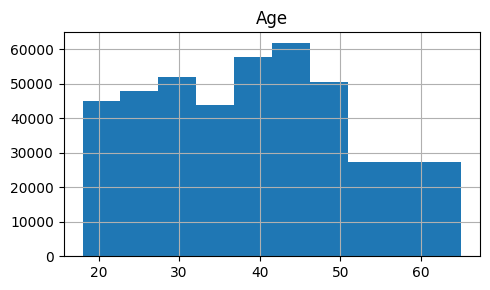

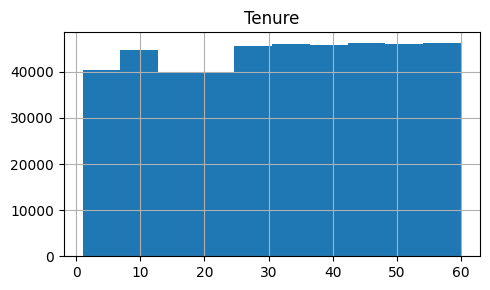

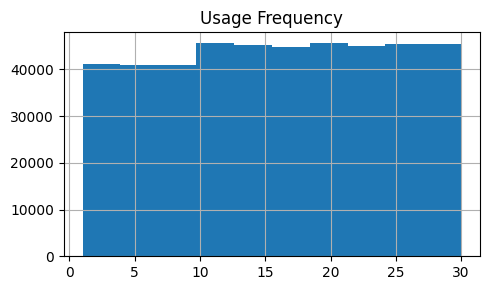

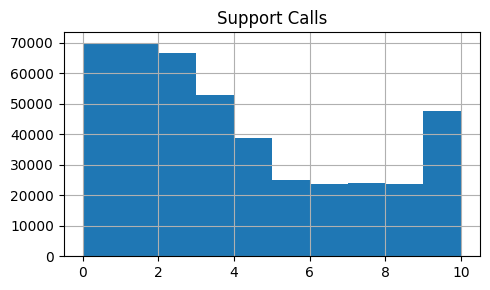

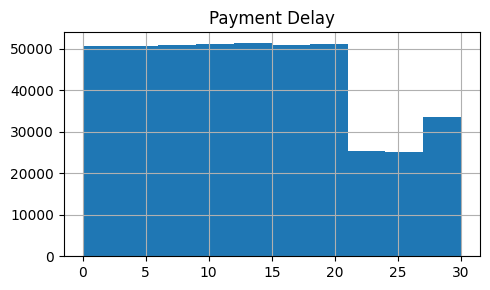

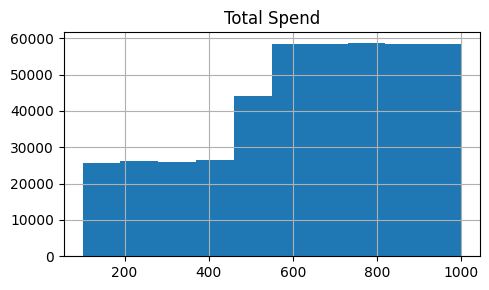

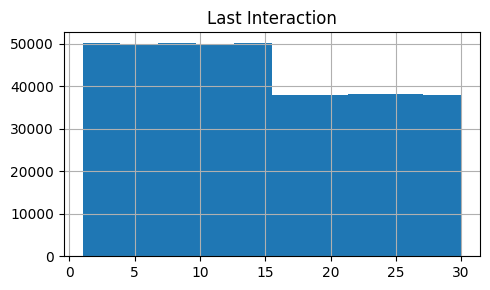

In [8]:
# histograms of num vars
num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

for col in num_cols:
    fig = plt.figure(figsize=(5, 3))
    df[col].hist(bins=10, figsize=(5,3))
    plt.title(col)
    plt.tight_layout()
    plt.show()
    print('\n\n')


In [9]:
# cat cols vs churn
print(pd.crosstab(df['Gender'], df['Churn'], normalize='index') * 100)
print(pd.crosstab(df['Subscription Type'], df['Churn'], normalize='index') * 100)
print(pd.crosstab(df['Contract Length'], df['Churn'], normalize='index') * 100)

Churn         0.0        1.0
Gender                      
Female  33.330885  66.669115
Male    50.873120  49.126880
Churn                    0.0        1.0
Subscription Type                      
Basic              41.821767  58.178233
Premium            44.058300  55.941700
Standard           43.930047  56.069953
Churn                  0.0         1.0
Contract Length                       
Annual           53.923859   46.076141
Monthly           0.000000  100.000000
Quarterly        53.974395   46.025605


Age by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


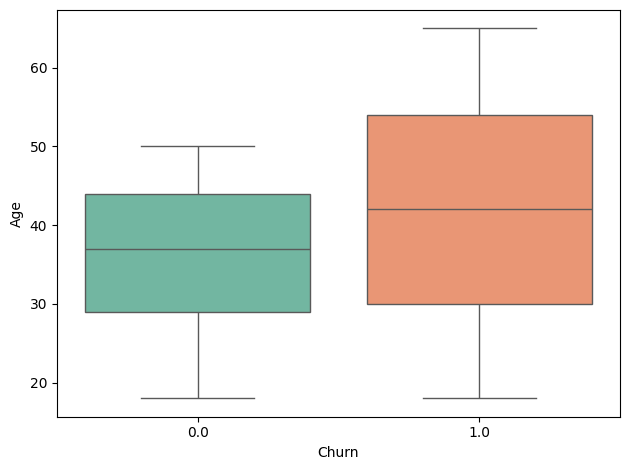

Tenure by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


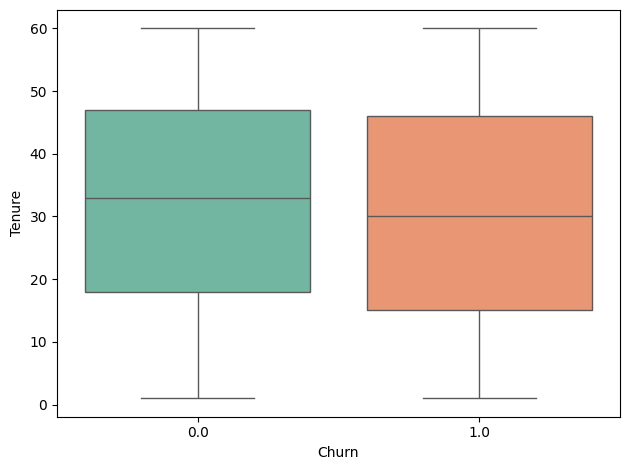

Usage Frequency by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


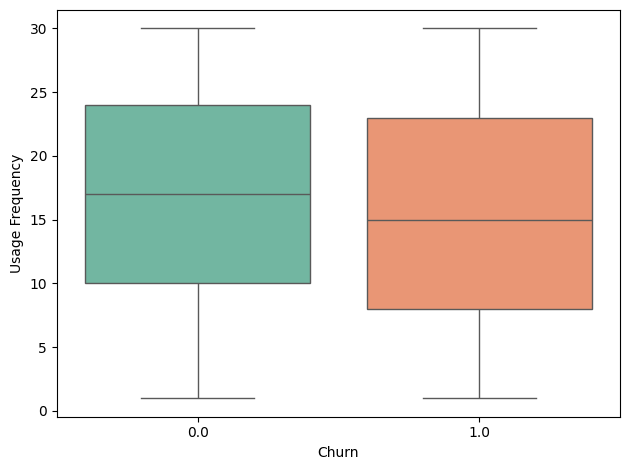

Support Calls by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


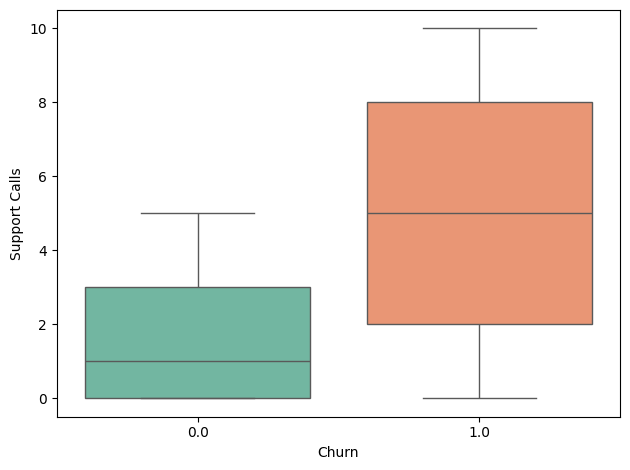

Payment Delay by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


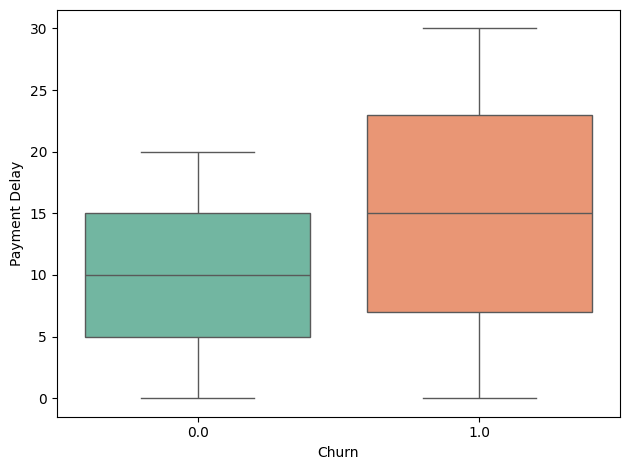

Total Spend by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


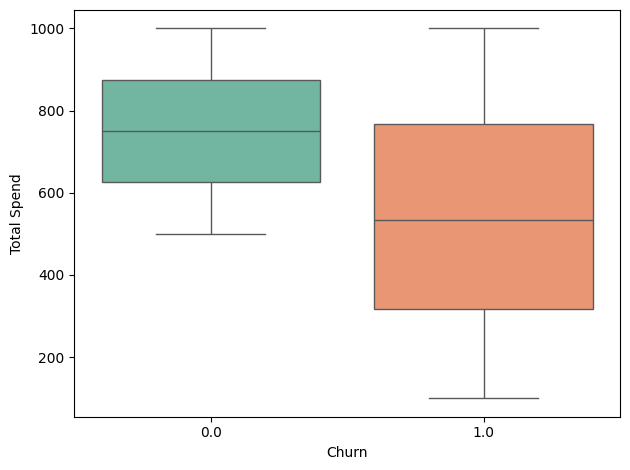

Last Interaction by Churn


C:\Users\logan\AppData\Local\Temp\ipykernel_10068\2118388985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Churn', y=col, palette='Set2')


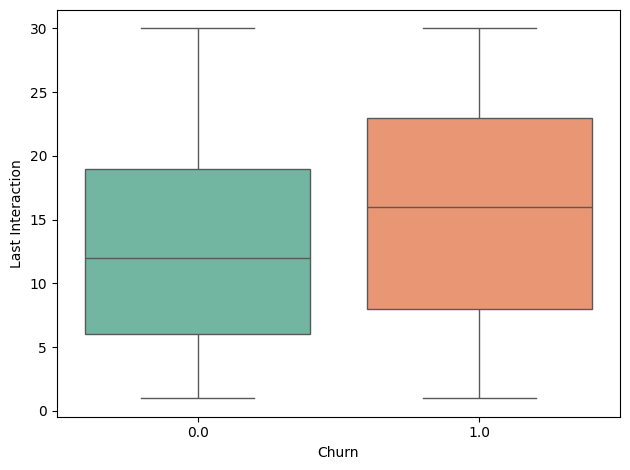

In [16]:
# boxplots of numeric cols by churn
for col in num_cols:
    print(f'{col} by Churn')
    sns.boxplot(df, x='Churn', y=col, palette='Set2')
    plt.tight_layout()
    plt.show()

In [ ]:
''' Observations from EDA
    - females more likely to churn (+16% compared to males)
    - older more likely to churn as well
    - monthly users have 100% historical churn rate (assuming this company discontinued monthly or does not have recurring payments set up for monthly)
    - 56% of total users churn
    - Older folks more likely to churn
    - More support calls appears to lead to greater churn likelihood, same for payment delay and last interaction
    - Higher spend appears to lead to lower churn likelihood
    - Distributions look to be almost like a piecewise uniform distribution for many cols'''


''' Next steps
    - remove Contract Length from the predictive model.  It seems that there is a major data flaw with monthly users having a 100% churn rate
    on 80,000+ observations.  This is highly unlikely, near impossible.  Data entry error is much more likely.  Since quarterly and yearly users are
    within 0.05% of each other when comparing churn, we will remove the entire variable from the model.  We choose to do this because quarterly vs 
    yearly doesn't seem to make a big difference when predicting churn just based off of Contract Length variable, and because of the massive
    data problem with monthly being 100% churn.
    - covariance matrix / correlation matrix'''
